In [2]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('amazon_alexa.tsv',sep='\t')

In [5]:
data

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [6]:
reviews=data[['verified_reviews']]

In [7]:
reviews

,verified_reviews
0,Love my Echo!
1,Loved it!
2,"Sometimes while playing a game, you can answer..."
3,I have had a lot of fun with this thing. My 4 ...
4,Music
...,...
3145,"Perfect for kids, adults and everyone in betwe..."
3146,"Listening to music, searching locations, check..."
3147,"I do love these things, i have them running my..."
3148,Only complaint I have is that the sound qualit...


In [8]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   verified_reviews  3150 non-null   object
dtypes: object(1)
memory usage: 24.7+ KB


In [9]:
### text preprocessing
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.metrics import accuracy_score,classification_report
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [10]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
r_data=[verified_reviews.strip() for verified_reviews  in reviews.verified_reviews]
r_data=[verified_reviews for verified_reviews in r_data if verified_reviews]

In [12]:
r_data[0:10]


['Love my Echo!',
 'Loved it!',
 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.',
 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.',
 'Music',
 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.',
 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.',
 "I think this is the 5th one I've

In [13]:
r_data1=' '.join(r_data)

In [14]:
no_pun_data=r_data1.translate(str.maketrans('','',string.punctuation))
no_pun_data

'Love my Echo Loved it Sometimes while playing a game you can answer a question correctly but Alexa says you got it wrong and answers the same as you  I like being able to turn lights on and off while away from home I have had a lot of fun with this thing My 4 yr old learns about dinosaurs i control the lights and play games like categories Has nice sound when playing music as well Music I received the echo as a gift I needed another Bluetooth or something to play music easily accessible and found this smart speaker Can’t wait to see what else it can do Without having a cellphone I cannot use many of her features I have an iPad but do not see that of any use  It IS a great alarm  If u r almost deaf you can hear her alarm in the bedroom from out in the living room so that is reason enough to keep herIt is fun to ask random questions to hear her response  She does not seem to be very smartbon politics yet I think this is the 5th one Ive purchased Im working on getting one in every room o

In [15]:
tco_data=word_tokenize(no_pun_data)

In [16]:
tco_data[0:10]

['Love',
 'my',
 'Echo',
 'Loved',
 'it',
 'Sometimes',
 'while',
 'playing',
 'a',
 'game']

In [17]:
my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in tco_data if not word in my_stop_words]
print(no_stop_tokens[0:40])

['Love', 'Echo', 'Loved', 'Sometimes', 'playing', 'game', 'answer', 'question', 'correctly', 'Alexa', 'says', 'got', 'wrong', 'answers', 'I', 'like', 'able', 'turn', 'lights', 'away', 'home', 'I', 'lot', 'fun', 'thing', 'My', '4', 'yr', 'old', 'learns', 'dinosaurs', 'control', 'lights', 'play', 'games', 'like', 'categories', 'Has', 'nice', 'sound']


In [18]:
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['love', 'echo', 'loved', 'sometimes', 'playing', 'game', 'answer', 'question', 'correctly', 'alexa', 'says', 'got', 'wrong', 'answers', 'i', 'like', 'able', 'turn', 'lights', 'away', 'home', 'i', 'lot', 'fun', 'thing']


In [19]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['love', 'echo', 'love', 'sometim', 'play', 'game', 'answer', 'question', 'correctli', 'alexa', 'say', 'got', 'wrong', 'answer', 'i', 'like', 'abl', 'turn', 'light', 'away', 'home', 'i', 'lot', 'fun', 'thing', 'my', '4', 'yr', 'old', 'learn', 'dinosaur', 'control', 'light', 'play', 'game', 'like', 'categori', 'ha', 'nice', 'sound']


In [20]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [21]:
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

Love Echo Loved Sometimes playing game answer question correctly Alexa says got wrong answers I like able turn lights away home I lot fun thing My 4 yr old learns dinosaurs control lights play games like categories Has nice sound


In [22]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['Love', 'Echo', 'Loved', 'sometimes', 'play', 'game', 'answer', 'question', 'correctly', 'Alexa', 'say', 'get', 'wrong', 'answer', 'I', 'like', 'able', 'turn', 'light', 'away', 'home', 'I', 'lot', 'fun', 'thing']


In [47]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [26]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(reviews)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(reviews)
print(vectorizer_n_gram_max_features.get_feature_names_out())
print(tf_idf_matrix_n_gram_max_features.toarray())

['verified_reviews']
[[1.]]


In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");

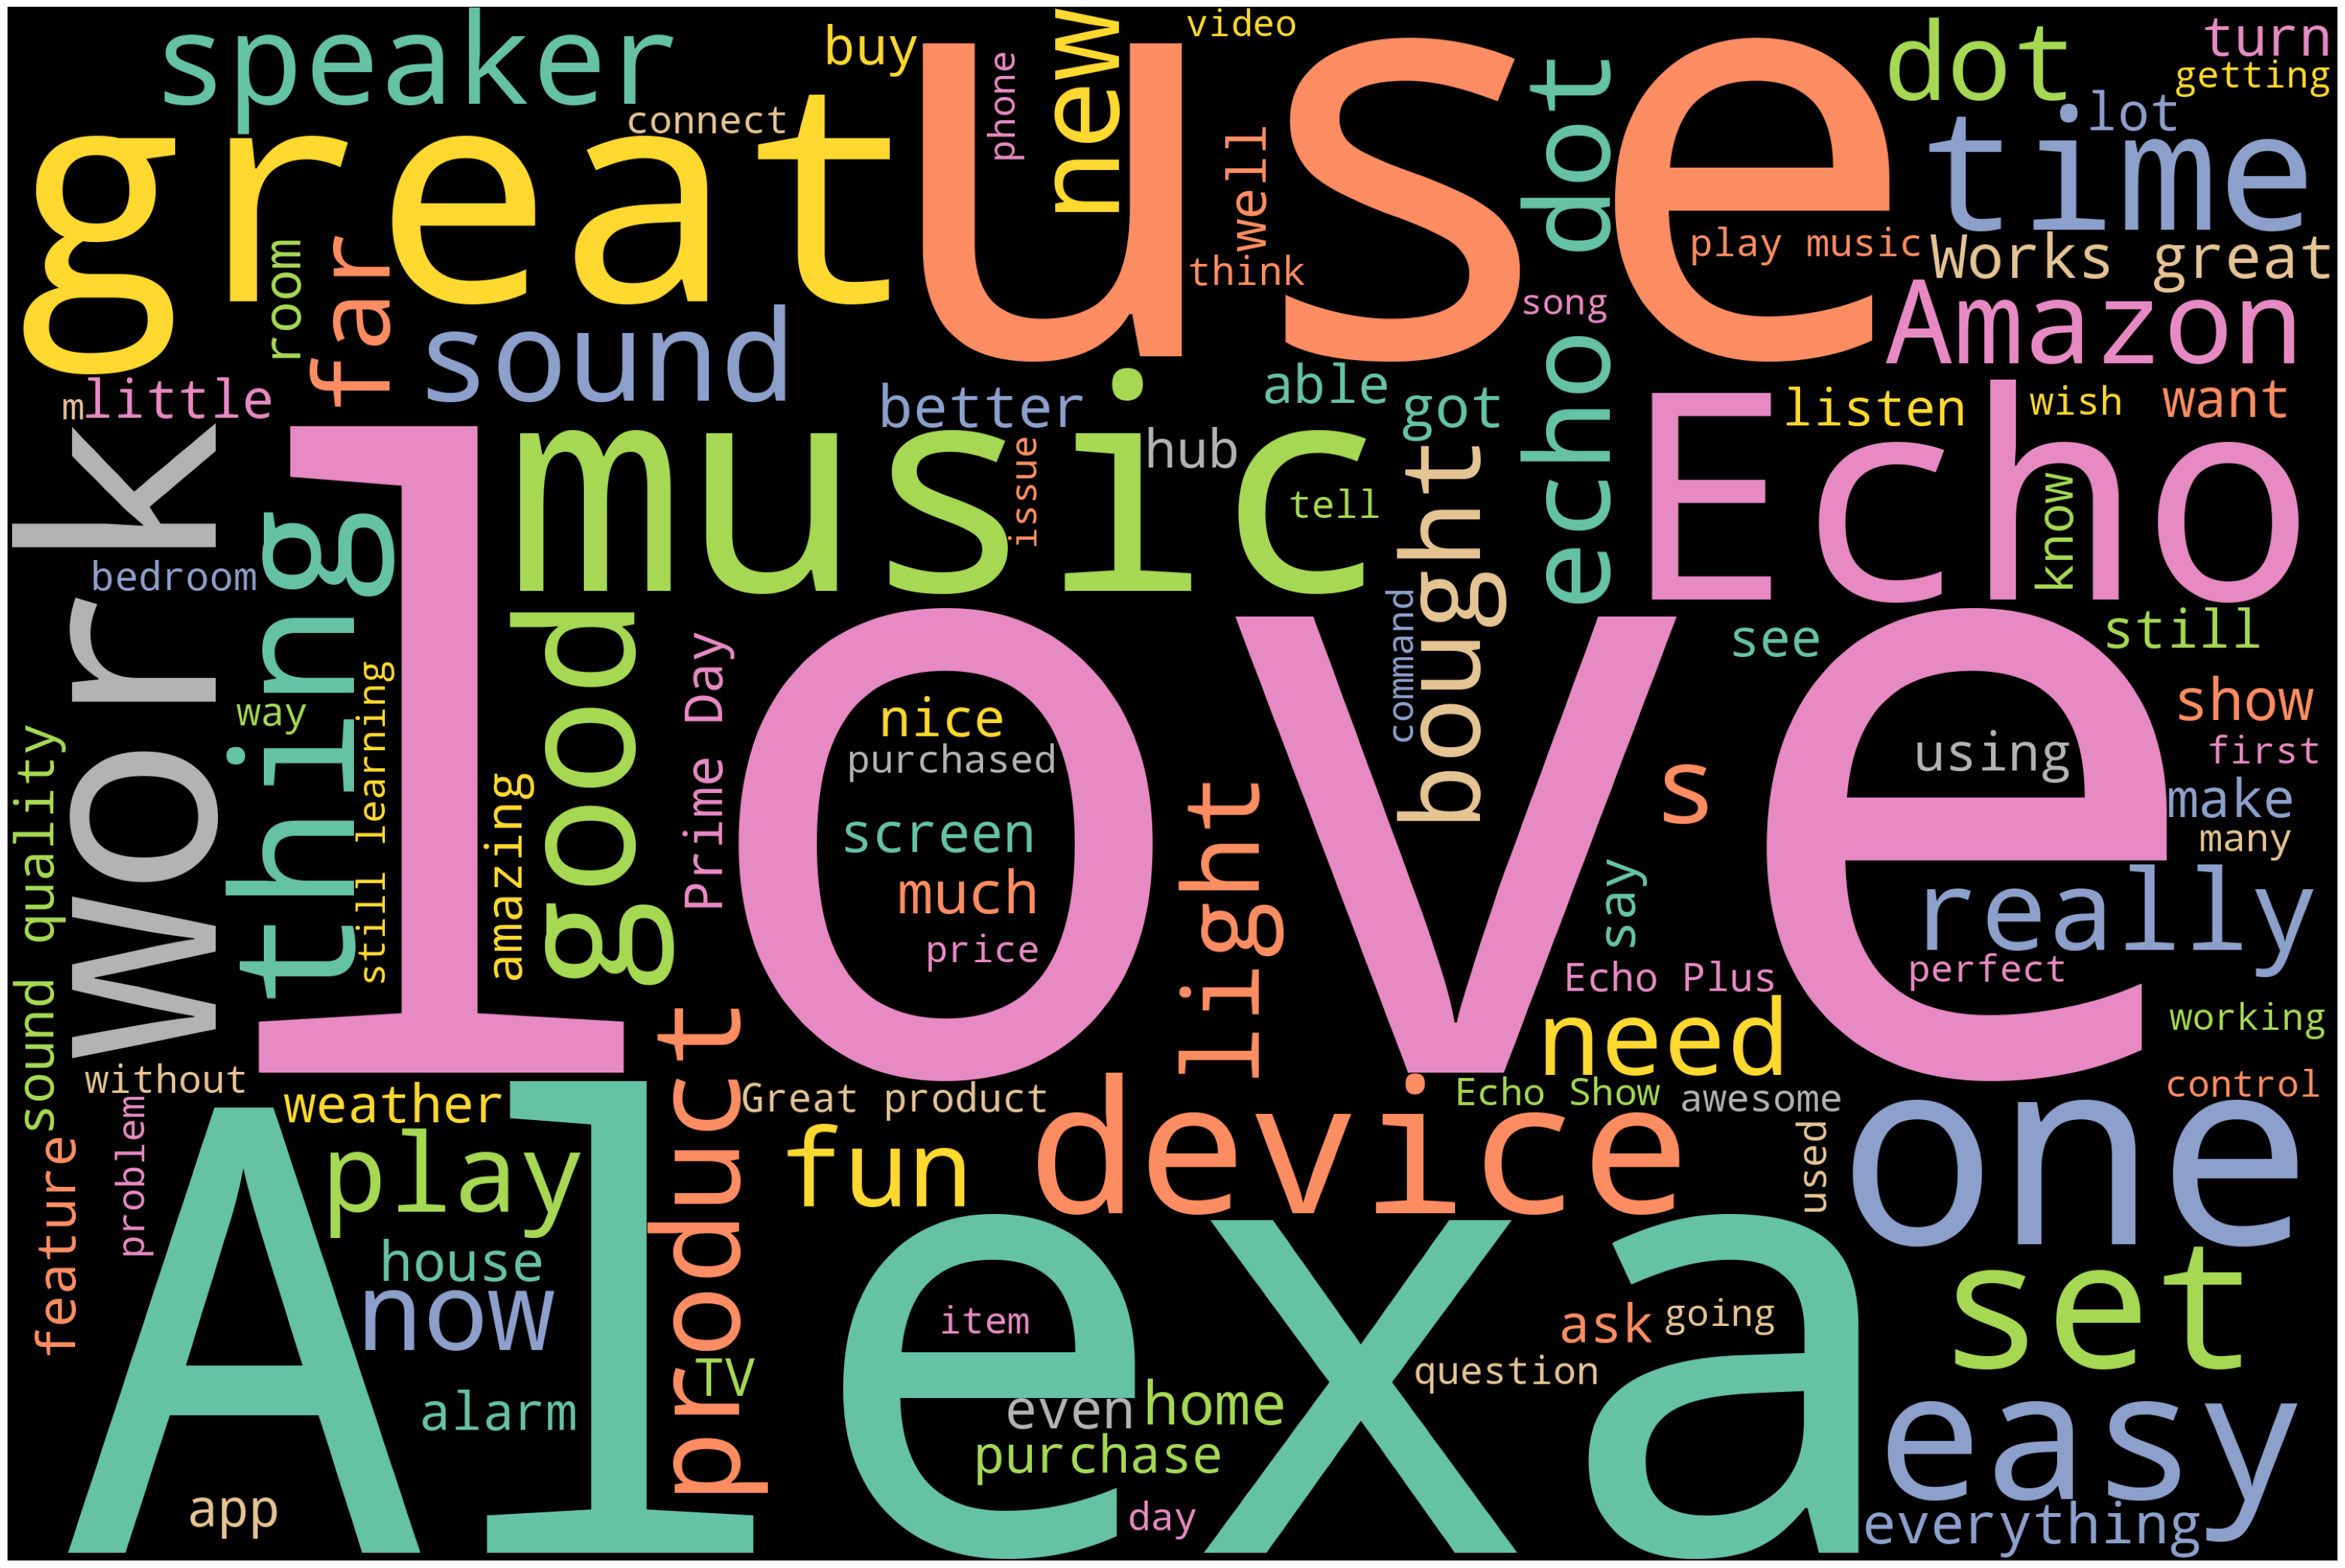

In [55]:
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(r_data1)
# Plot
plot_cloud(wordcloud)

In [56]:
## by looking the results every one loves the product

In [72]:
good_words=pd.read_csv('positive-words.txt',error_bad_lines=False)

<ipython-input-72-3e6ed8a06944>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  good_words=pd.read_csv('positive-words.txt',error_bad_lines=False)
Skipping line 10: expected 1 fields, saw 2
Skipping line 14: expected 1 fields, saw 5
Skipping line 15: expected 1 fields, saw 3
Skipping line 16: expected 1 fields, saw 2
Skipping line 18: expected 1 fields, saw 3
Skipping line 19: expected 1 fields, saw 3
Skipping line 27: expected 1 fields, saw 3
Skipping line 28: expected 1 fields, saw 2



In [75]:
good_words=good_words.iloc[10:,:]

In [78]:
good_words.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'good_word'},inplace=True)

<ipython-input-78-05dc6e76634f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_words.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'good_word'},inplace=True)


In [101]:
good_words.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005 entries, 26 to 2030
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   good_word  2005 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB


In [99]:
good_word_1=" ".join([w for w in lower_words if w in stemmed_tokens])

In [100]:
good_word_1

'love echo game answer question alexa got wrong i like turn away home i lot fun thing my 4 yr old control play like nice sound music well music i echo gift i bluetooth play music found smart speaker can ’ wait see without i use i ipad see use it is great alarm if u r almost deaf hear alarm bedroom room reason enough keep herit fun ask random hear she seem smartbon yet i think 5th one ive im one room i like offer music throughout great love i ’ i ’ heard childhood i get news weather it ’ great i sent 85 year old dad i love knew eveyday still far use understand she make laugh i mother knee give come around fast like big doalexa play song what time cook love love love just i i love wife great speaker set we alexa lot fun new toy it like new household member we learn come we love size 2nd echo still sound i original echo shorter greater fabriccolor i miss ring top not big deal ring w other well i like use standard usb charger port instead previous round pin other i guess work still so like